# Case Study # 2: Classification Tree for Flight Status
# Solutions to the Case

## Import required packages.

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from dmba import plotDecisionTree, classificationSummary

%matplotlib inline   
import matplotlib.pylab as plt

## Upload, explore, clean, and preprocess data for classification tree.

In [3]:
# Create data frame for FlightDelays data set and show
# the first 10 records.
flight_df = pd.read_csv('FlightDelays.csv')

# Determine dimensions of dataframe.
print('')
print('Data Set Dimensions:', flight_df.shape)


Data Set Dimensions: (2201, 11)


In [4]:
# Drop (remove)'DEST' and 'ORIGIN' variables which are
# not relevant for model building.
flight_df = flight_df.drop(columns=['DEST', 'ORIGIN'])

# Display columns data types.
print('')
print('Column Types')
print(flight_df.dtypes)


Column Types
SCH_TIME      int64
CARRIER      object
DEP_TIME      int64
DISTANCE      int64
FL_NUM        int64
WEATHER       int64
WK_DAY        int64
MTH_DAY       int64
FL_STATUS    object
dtype: object


In [5]:
# Need to change 'CARRIER' variable type to 'category'. 
#flight_df.CARRIER = flight_df.CARRIER.astype('category')

# Display category levels (classes).
#print(' ')
#print('Category Levels (Classes) for CARRIER:')
#print(flight_df.CARRIER.cat.categories) 

# Convert 'CARRIER' variable classes into binary variables.
# Drop the first class 'CO'.
flight_df = pd.get_dummies(flight_df, columns=['CARRIER'], 
                            drop_first=True)

# Display modified columns for the data set.
print('')
print('Modified Columns for FlightDelays Data Set')
print(flight_df.dtypes)


Modified Columns for FlightDelays Data Set
SCH_TIME       int64
DEP_TIME       int64
DISTANCE       int64
FL_NUM         int64
WEATHER        int64
WK_DAY         int64
MTH_DAY        int64
FL_STATUS     object
CARRIER_DH     uint8
CARRIER_DL     uint8
CARRIER_MQ     uint8
CARRIER_OH     uint8
CARRIER_RU     uint8
CARRIER_UA     uint8
CARRIER_US     uint8
dtype: object


In [6]:
# Display the first 10 records of the modified data set.
print('')
print('First 10 Records of Modfied FlightDelays Data Set')
print(flight_df.head(10))


First 10 Records of Modfied FlightDelays Data Set
   SCH_TIME  DEP_TIME  DISTANCE  FL_NUM  WEATHER  WK_DAY  MTH_DAY FL_STATUS  \
0      1455      1455       184    5935        0       4        1    ontime   
1      1640      1640       213    6155        0       4        1    ontime   
2      1245      1245       229    7208        0       4        1    ontime   
3      1715      1709       229    7215        0       4        1    ontime   
4      1039      1035       229    7792        0       4        1    ontime   
5       840       839       228    7800        0       4        1    ontime   
6      1240      1243       228    7806        0       4        1    ontime   
7      1645      1644       228    7810        0       4        1    ontime   
8      1715      1710       228    7812        0       4        1    ontime   
9      2120      2129       228    7814        0       4        1    ontime   

   CARRIER_DH  CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  CARRIER_UA  \
0 

In [7]:
# Develop predictors X and output variable Y for the data set.
X = flight_df.drop(columns=['FL_STATUS'])
y = flight_df['FL_STATUS']

# Develop training (70%) and validation(30% or 0.3) partitions for
# UniversalBank data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)


Classes: delayed, ontime

Flight Delays Classification Tree after 5 Splits


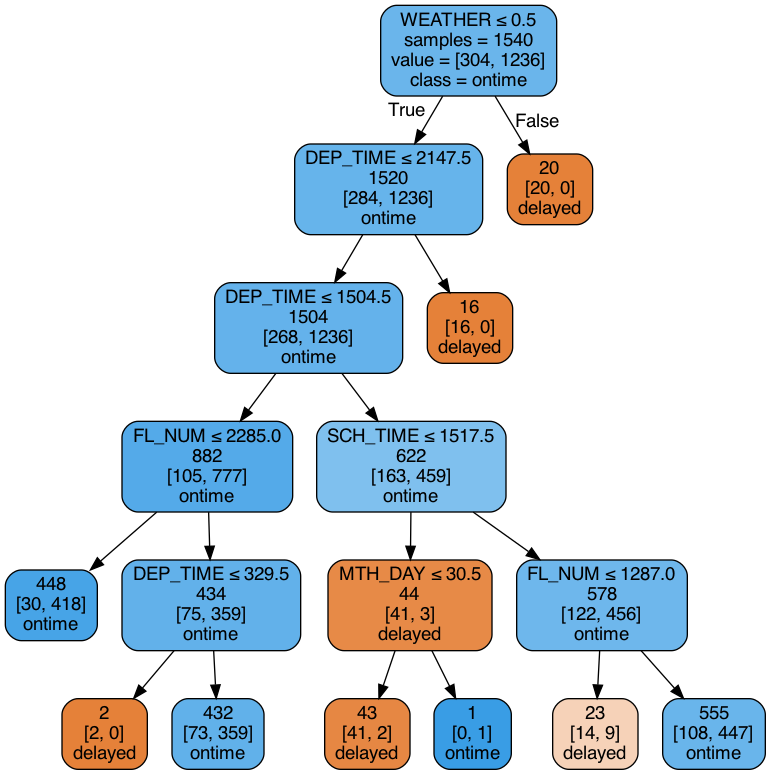

In [8]:
# Develop a classification tree using training partition.
flight_tree = DecisionTreeClassifier(max_depth=5, 
                min_impurity_decrease=0.001, min_samples_split=10)
flight_tree.fit(train_X, train_y)

# Display classes used in the classification tree: 'delayed' and 'ontime'.
print("Classes: {}".format(', '.join(flight_tree.classes_)))

# Use plotDecisionTree() function to visualize the classfication tree.
# The order of the 'value' in the boxes is the same as 'flight_tree.classes_',
# i.e., the first number is 'delays' and the second number 'ontime'.
print()
print('Flight Delays Classification Tree after 5 Splits')
plotDecisionTree(flight_tree, feature_names=train_X.columns, class_names=flight_tree.classes_)

In [9]:
# Confusion matrices for full classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Training Partition for Smaller Tree')
classificationSummary(train_y, flight_tree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Smaller Tree')
classificationSummary(valid_y, flight_tree.predict(valid_X))

Training Partition for Smaller Tree
Confusion Matrix (Accuracy 0.8558)

       Prediction
Actual    0    1
     0   93  211
     1   11 1225

Validation Partition for Smaller Tree
Confusion Matrix (Accuracy 0.8427)

       Prediction
Actual   0   1
     0  39  85
     1  19 518


## Grid search for Flight Delays classification tree.

In [10]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 25)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(5, 20)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.8838
Improved parameters:  {'max_depth': 22, 'min_impurity_decrease': 0.001, 'min_samples_split': 5}


Best Classification Tree with Grid Search


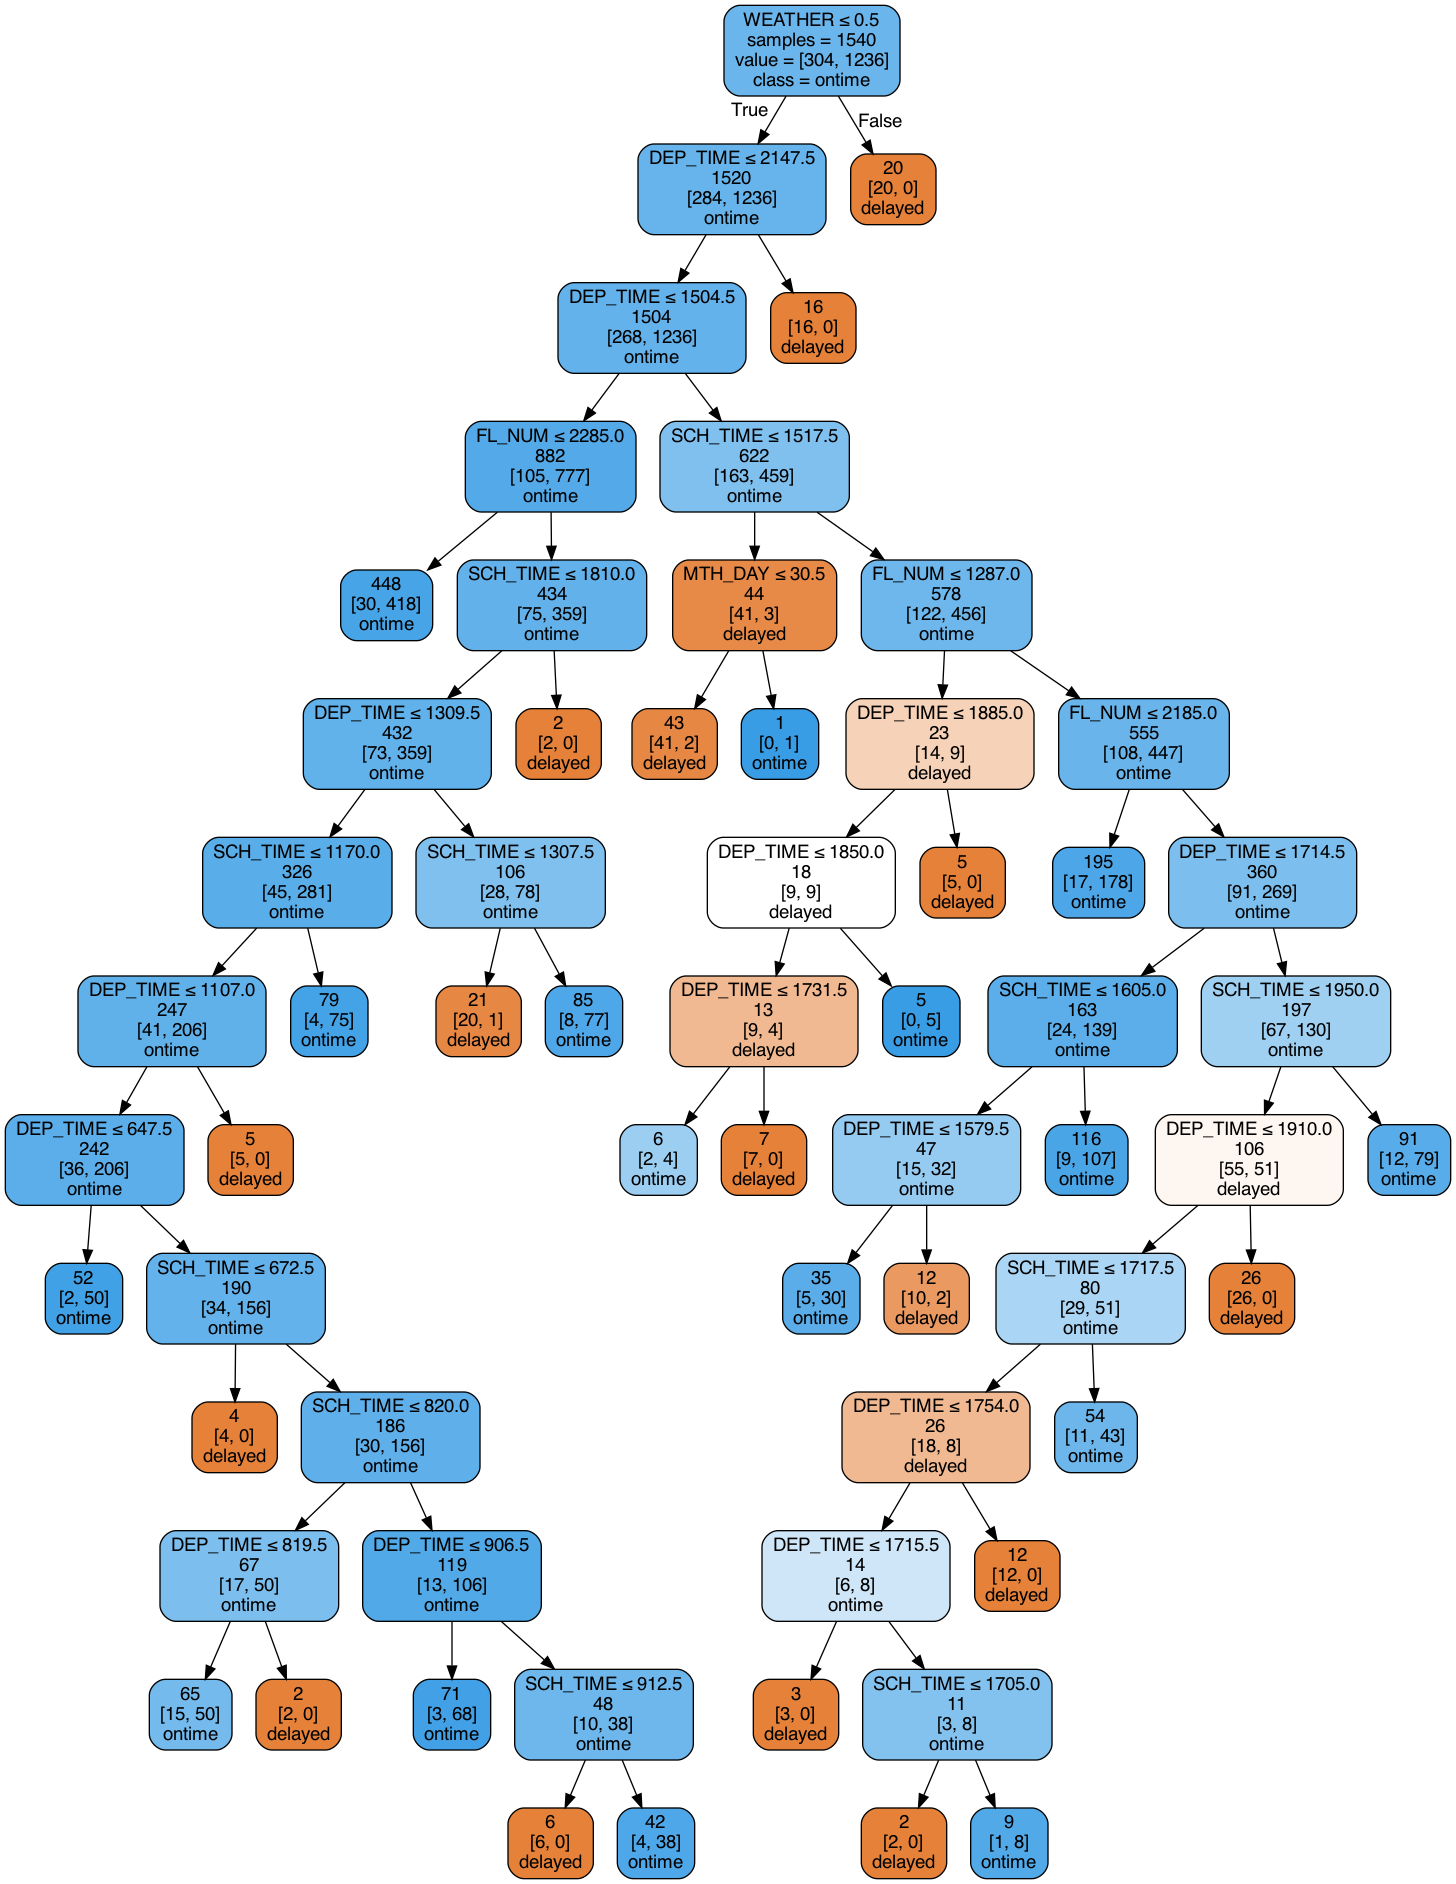

In [11]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns, class_names=flight_tree.classes_)

In [12]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Best Classification Tree with Grid Search')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Best Classification Tree with Grid Search')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition for Best Classification Tree with Grid Search
Confusion Matrix (Accuracy 0.9169)

       Prediction
Actual    0    1
     0  181  123
     1    5 1231

Validation Partition for Best Classification Tree with Grid Search
Confusion Matrix (Accuracy 0.8941)

       Prediction
Actual   0   1
     0  69  55
     1  15 522
